# Loading libraries & Setup

Importing Pandas, Numpy, Matplotlib and some Scikit-learn algorithms and functions.

In [159]:
# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Scikit-learn algorithms and functions
from sklearn.neighbors import KNeighborsClassifier # Scikit-learn KNeighbors Classifier
from sklearn.tree import DecisionTreeClassifier # Scikit-learn Decision Tree Classifier
from sklearn.model_selection import KFold # Scikit-learn K-Folds cross-validator
from sklearn.model_selection import cross_val_score # evaluating cross-validator performance
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Display Matplotlib output inline
%matplotlib inline

# Load Titanic data

In [123]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

# Exploratory data analysis

It is always a good practice to look at the data.

Let's look at noth train and test data. The only difference between them is the Survived column which indicates if the passenger survived the disaster or not.

Below is also an explanation of each field in the data set.

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId: unique ID of the passenger
- Survived: 0 = No, 1 = Yes
- Pclass: passenger class 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: name of the passenger
- Sex: passenger's sex
- Age: passenger's age
- SibSp: number of siblings or spouses on the ship
- Parch: number of parents or children on the ship
- Ticket: Ticket ID
- Fare: the amount paid for the ticket
- Cabin: cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Let's now look at the dimensionality of the train DataFrame.

In [125]:
train.shape

(891, 12)

We can see that the train data set has 891 records and 12 columns.

Let's do the same for the test data set.

In [126]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
test.shape

(418, 11)

The only difference with the test data set is the number of records which is 418 and the number of columns which is 11. We are missing the Survived column in the test data set. We will be predicting the Survived column with the machine learning model we are going to build.

In [128]:
print('There are ' + str(len(train)+len(test)) + ' passengers in both data sets.')
print(str(len(train)) + ' in train data set.')
print(str(len(test)) + ' in train data set.')

There are 1309 passengers in both data sets.
891 in train data set.
418 in train data set.


What we can also see already is that we some missing data (NaN values) in our data sets. For our classification model to work effectively we will have to do something with the missing data. We will check this in details and deal with it a little bit later but for now let's just look at the Pandas info() function so we can get an idea about the missing vcalues.

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that in the training data Age, Cabin and Embarked has some missing values.

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We have a similar situation in the test data set.

We can also check for null values using isnull() function.

In [131]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Which confirms our earlier findings.

Now let's look at in a little bit more detail on the data just to get an ideal what is in it.

A good way to do it is to draw some charts from the data.

In our project we will use Matplotlib library to display some charts.

We are primarily interested in characteristics of passengers who survived or not.

We will now create a function that will display survived or not the Titanic disaster against a specified feature.

We will be using only train data set for that because only in this data set we have survival information.

In [133]:
def showChart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(12,8))

And now let's build the charts for selected features.

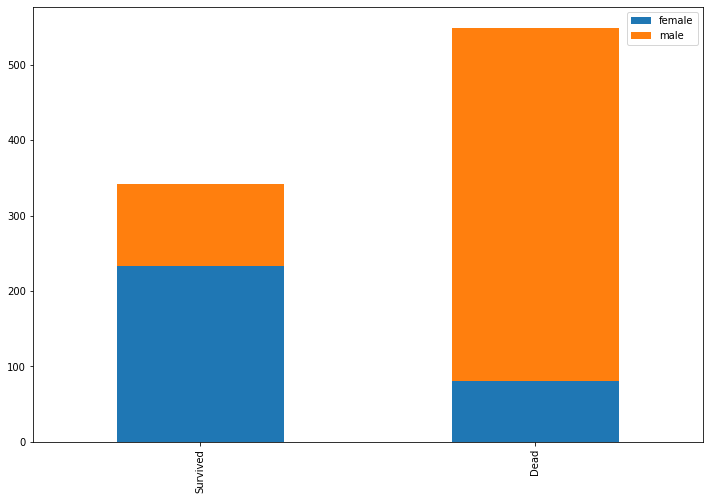

In [134]:
showChart('Sex')

We can see that significantly more females survived than males. We have even more significant results for passengers that did not survived where females make a very small percentage in comparison to males.

Now let's look at the pasenger's class.

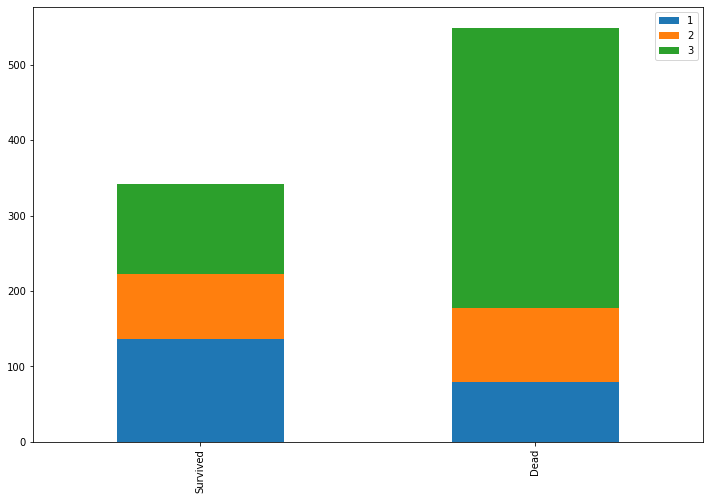

In [135]:
showChart('Pclass')

We can see here that passengers from the 3rd class were more likely to die than passengers from the fist class which had the higher changes to survive.

These and other relationships between the features and the survival rate are very important to us and to our machine learning model.

# Feature engineering

Once we have loaded our data sets and have a good understanding of the data we are working with, we will perform some feature engineering.

Feature engineering is the process of extracting features from the existing features in the data set in order to improve the performance of the machine larning model.

Usually that means not only creating new features but also replacing missing values and removing features that do not contribute to the performance of the model.

Let's have a look again at the missing values in our train data set.

In [136]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Replace missing value with the median value for the column

We have many missing values in the Age column. We will fill all the missing values in the Age column with the median values for that column. Median value is "the middle" value for the columns. To make the values more accurate we will calculate the median value for each Sex separately. We will also perform this for both train and test data set.

In [138]:
train["Age"].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)
test["Age"].fillna(test.groupby('Sex')['Age'].transform("median"), inplace=True)

In [139]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can see that all NaN values were replaced with the number.

In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

And we no longer have null values in the train data set.

What we are also going to do here with age is that we can use a technique called data binning and put people of different age into different bins (groups). This usually improves the performance of the machine learning models.

We are going to put the passengers to four age groups:
- 1: (age <= 18)
- 2: (age > 18 and <= 40)
- 3: (age > 40 and <= 60)
- 4: (age > 60)

We will perform this for train and test data.

In [141]:
train.loc[train['Age'] <= 18, 'Age'] = 1
train.loc[(train['Age'] > 18) & (train['Age'] <= 40), 'Age'] = 2
train.loc[(train['Age'] > 40) & (train['Age'] <= 60), 'Age'] = 3
train.loc[train['Age'] > 60, 'Age'] = 4

In [142]:
test.loc[test['Age'] <= 18, 'Age'] = 1
test.loc[(test['Age'] > 18) & (test['Age'] <= 40), 'Age'] = 2
test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 3
test.loc[train['Age'] > 60, 'Age'] = 4

In [143]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,2.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,3.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,1.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,2.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1.0,1,0,237736,30.0708,NaN,C


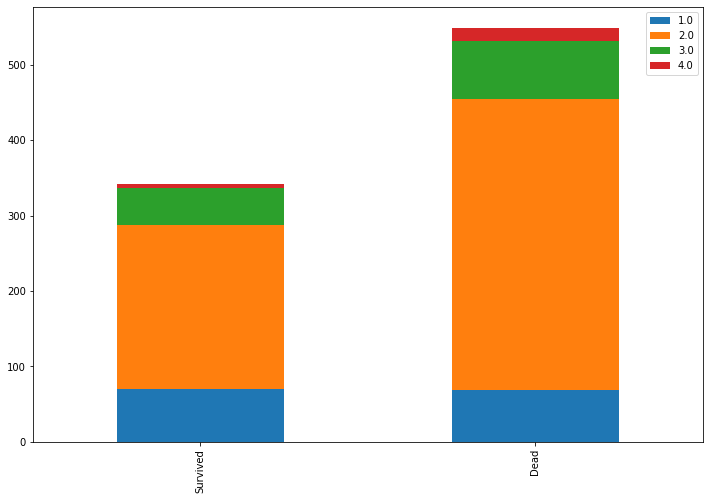

In [144]:
showChart('Age')

Because machine learning models operate only on numeric values we need to replace test values for the column Sex with numbers to create numeric categories. These will be our categories:
- 0: male
- 1: female

In [145]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S


In [146]:
sex_mapping_values = {"male": 0, "female": 1}

train.replace({'Sex':sex_mapping_values}, inplace=True)
test.replace({'Sex':sex_mapping_values}, inplace=True)

One other thing that would be useful to do is to extract Title information like (Mr. Mrs. Miss.) from the Name column and create bins (groups) similar to what we have done with the Age column and after that drop the Name column.

In [147]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [148]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

Let's display the created values.

In [149]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Mme           1
Ms            1
Countess      1
Capt          1
Don           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [150]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

As we can see we only really have 3 major groups here, Mr, Miss and Mrs. We will create four bins (grups) here with these groups and put everything else into the Other category. our groups are going to look like this:

- 1: Mr
- 2: Miss
- 3: Mrs
- 4: everything else

In [151]:
title_mapping_values = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Sir": 3, "Mme": 3, "Ms": 3, "Countess": 3, "Capt": 3, "Don": 3, "Dona": 3, "Jonkheer": 3, "Lady": 3}

train.replace({'Title':title_mapping_values}, inplace=True)
test.replace({'Title':title_mapping_values}, inplace=True)

Now let's look at the graph of the Title data.

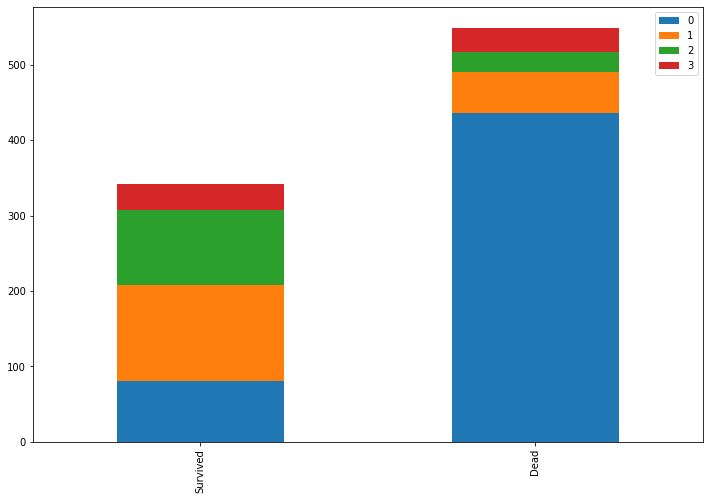

In [152]:
showChart('Title')

As we can see people with the Title Mr. has significantly less change to survive which should be a useful information for our machine learning model.

## Removing unnecessary features

Now, let's remove the features we don't think we need to train the model. In our example it will be 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'. We could still probably extract some additional features from those but for now we can decide to remove them and train our model without them.

In [168]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,2.0,1,0,0
1,1,1,1,2.0,1,0,2
2,1,3,1,2.0,0,0,1
3,1,1,1,2.0,1,0,2
4,0,3,0,2.0,0,0,0


In [154]:
features2drop = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train = train.drop(features2drop, axis=1)
test = test.drop(features2drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [155]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,2.0,1,0,0
1,1,1,1,2.0,1,0,2
2,1,3,1,2.0,0,0,1
3,1,1,1,2.0,1,0,2
4,0,3,0,2.0,0,0,0


In [156]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [157]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,0,2.0,1,0,0
1,1,1,2.0,1,0,2
2,3,1,2.0,0,0,1
3,1,1,2.0,1,0,2
4,3,0,2.0,0,0,0


# Building & training a Machine Learning model

Now we are ready to build and train our machine learning models.

We will use two different algorithms and compare the results to see which one performs better.

We are going to use K-nearest neighbors (KNN) classifier and Decision Tree classifier from Scikit-learn library.

## K-nearest neighbors (KNN) classifier

In [160]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.82022472 0.79775281 0.80898876 0.83146067
 0.82022472 0.79775281 0.82022472 0.84269663]


In [161]:
scoreP = round(np.mean(score)*100, 2)
print('Our KNN classifier score is ' + str(scoreP) + '%')


Our KNN classifier score is 81.26%


## Decision Tree classifier

In [162]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.78651685 0.78651685 0.86516854 0.78651685
 0.84269663 0.80898876 0.78651685 0.84269663]


In [164]:
scoreP = round(np.mean(score)*100, 2)
print('Our Decision Tree classifier score is ' + str(scoreP) + '%')


Our Decision Tree classifier score is 81.03%


As we can see both our models achieved similar results and we have achieved quite goood accuracy result of around 80% for both models which is great.

This result can be probably still improved by performing some moore feature engineering with Fare, Cabin and Embarked columns which we encourage your to do.

# Testing

Now we can run our model on the test data to predict the values.

In [166]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [167]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
results = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': prediction
})
results.to_csv('titanic-submission.csv', index=False)

In [ ]:
submision = pd.read_csv('titanic-submission.csv')
submision.head()

If you want you can upload your results here (https://www.kaggle.com/c/titanic) and take part in the Kaggle Titanic competition.